<a href="https://colab.research.google.com/github/white22ne/ProyectoDS_Partel-Blanco.ipynb/blob/main/ProyectoDS_Partel%2BBlanco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El dataset que voy a usar en este proyecto contiene información de distintos autos junto con varias características que pueden influir en su precio. Cada fila representa un auto y cada columna describe un atributo específico. Las variables principales que trae el dataset son:

Car ID: el identificador de cada auto.

Brand: la marca.

Year: año del vehículo.

Engine Size: tamaño del motor.

Fuel Type: tipo de combustible (nafta, diésel, eléctrico, etc.).

Transmission: tipo de transmisión (manual o automática).

Mileage: kilometraje del auto.

Condition: estado del vehículo (nuevo, usado, como nuevo).

Price: precio del auto.

Model: modelo específico de la marca.

Este dataset es útil porque incluye tanto variables numéricas (año, motor, kilometraje, precio) como categóricas (marca, tipo de combustible, condición). Eso permite analizar qué factores tienen más peso en el valor final del auto.

Con esta información se pueden investigar cosas como: si los autos más nuevos realmente valen más, si el kilometraje baja mucho el precio, si algunas marcas son más caras que otras, o si el tipo de combustible hace diferencia. También deja ver patrones generales del mercado y posibles relaciones entre las variables.

In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/white22ne/ProyectoDS_Partel-Blanco.ipynb/refs/heads/main/car_price_prediction_.csv"
car_price = pd.read_csv(url)
car_price.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [3]:
car_price.info() #se ve la cantidad de filas, columnas y los tipos de datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


In [4]:
car_price.describe(include='all')
#se obtienen estadísticas generales que ayudan a entender cómo se distribuyen variables como precio, año, kilometraje y tamaño del motor.


,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
count,2500.00000,2500,2500.0000,2500.000000,2500,2500,2500.000000,2500,2500.000000,2500
unique,NaN,7,NaN,NaN,4,2,NaN,3,NaN,28
top,NaN,Toyota,NaN,NaN,Diesel,Manual,NaN,Used,NaN,Fiesta
freq,NaN,374,NaN,NaN,655,1308,NaN,855,NaN,103
mean,1250.50000,NaN,2011.6268,3.465240,NaN,NaN,149749.844800,NaN,52638.022532,NaN
std,721.83216,NaN,6.9917,1.432053,NaN,NaN,87919.952034,NaN,27295.833455,NaN
min,1.00000,NaN,2000.0000,1.000000,NaN,NaN,15.000000,NaN,5011.270000,NaN
25%,625.75000,NaN,2005.0000,2.200000,NaN,NaN,71831.500000,NaN,28908.485000,NaN
50%,1250.50000,NaN,2012.0000,3.400000,NaN,NaN,149085.000000,NaN,53485.240000,NaN
75%,1875.25000,NaN,2018.0000,4.700000,NaN,NaN,225990.500000,NaN,75838.532500,NaN


In [6]:
car_price.isnull().sum()
#se identifican valores faltantes que podrían requerir limpieza.

,0
Car ID,0
Brand,0
Year,0
Engine Size,0
Fuel Type,0
Transmission,0
Mileage,0
Condition,0
Price,0
Model,0


# Conclusión del Análisis Exploratorio

# El análisis inicial del dataset me permitió entender cómo están distribuidos los datos y si había algún problema antes de avanzar. Los precios muestran que la mayoría de los autos se concentran en valores medios, mientras que solo unos pocos modelos aparecen con precios muy altos, lo que indica que hay casos premium pero no son comunes. En cuanto al año, se ve que el conjunto tiene muchos autos relativamente nuevos, lo que puede influir en el valor general del mercado. El kilometraje muestra bastante variedad, con autos muy usados y otros con poco recorrido, lo que es útil para analizar cómo ese factor afecta al precio. En general, el dataset está en buen estado, sin fallas importantes, y permite avanzar con las comparaciones entre variables para responder las hipótesis planteadas.

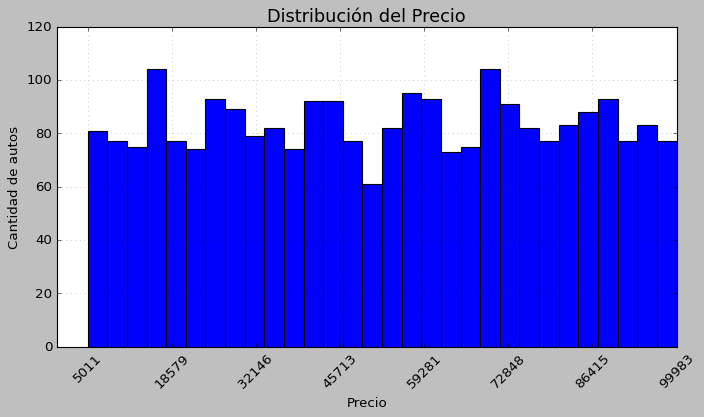

In [14]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))

plt.hist(car_price['Price'], bins=30, edgecolor='black')
plt.title("Distribución del Precio", fontsize=16)
plt.xlabel("Precio")
plt.ylabel("Cantidad de autos")
plt.grid(alpha=0.3)

# Ajuste del índice (ticks)
xmin = car_price['Price'].min()
xmax = car_price['Price'].max()
ticks = np.linspace(xmin, xmax, 8)   # 8 marcas bien separadas
plt.xticks(ticks, rotation=45)

plt.show()

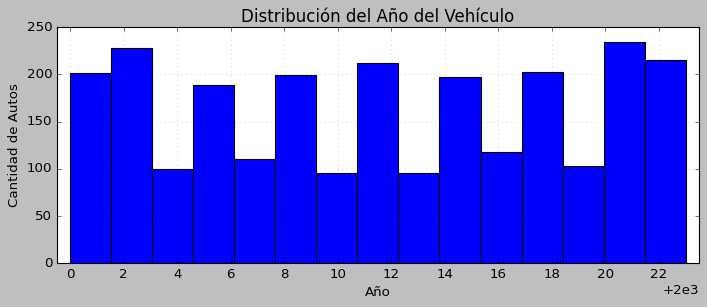

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Valores
years = car_price['Year']

plt.figure(figsize=(9, 4))

plt.hist(years, bins=15, edgecolor='black')
plt.title("Distribución del Año del Vehículo", fontsize=15)
plt.xlabel("Año")
plt.ylabel("Cantidad de Autos")
plt.grid(alpha=0.25)

# Ajuste de eje X para que no quede espacio vacío
xmin = years.min()
xmax = years.max()
plt.xlim(xmin - 0.5, xmax + 0.5)

# Ticks limpios
plt.xticks(np.arange(xmin, xmax + 1, 2))

plt.tight_layout()  # elimina espacios en blanco
plt.show()


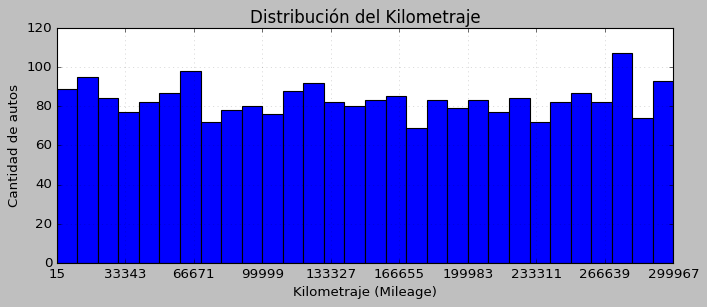

In [27]:
import matplotlib.pyplot as plt
import numpy as np

km = car_price['Mileage']

plt.figure(figsize=(9, 4))
plt.hist(km, bins=30, edgecolor='black')
plt.title("Distribución del Kilometraje", fontsize=15)
plt.xlabel("Kilometraje (Mileage)")
plt.ylabel("Cantidad de autos")
plt.grid(alpha=0.25)

# Ajuste de límites para que no quede espacio vacío
xmin = km.min()
xmax = km.max()
plt.xlim(xmin, xmax)

# Ticks ordenados para que no quede cargado
plt.xticks(np.linspace(xmin, xmax, 10).astype(int))

plt.tight_layout()
plt.show()


# En esta etapa se analizaron las distribuciones univariadas de las variables principales del dataset: Price, Year y Mileage. Esto permitió observar cómo se comportan individualmente los precios de los autos, la antigüedad de los vehículos y el kilometraje. Estos gráficos sirven como base para entender el rango, dispersión y posibles valores atípicos antes de avanzar al análisis bivariado.

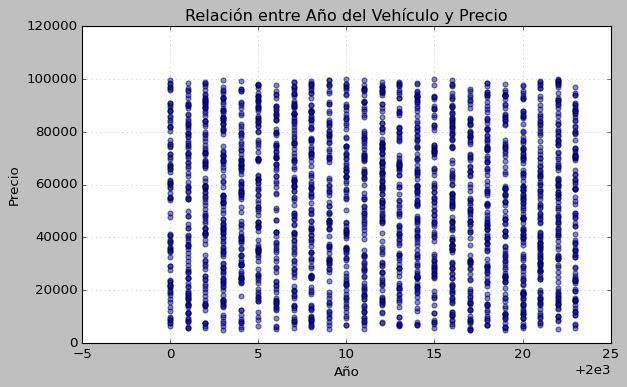

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(car_price['Year'], car_price['Price'], alpha=0.5, edgecolor='black')
plt.title("Relación entre Año del Vehículo y Precio")
plt.xlabel("Año")
plt.ylabel("Precio")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


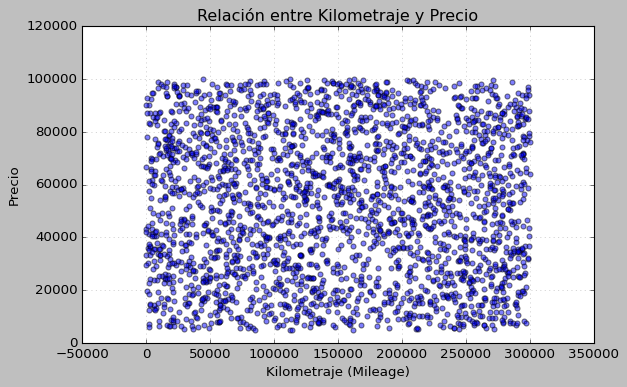

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.scatter(car_price['Mileage'], car_price['Price'], alpha=0.5, edgecolor='black')
plt.title("Relación entre Kilometraje y Precio")
plt.xlabel("Kilometraje (Mileage)")
plt.ylabel("Precio")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


<Figure size 800x400 with 0 Axes>

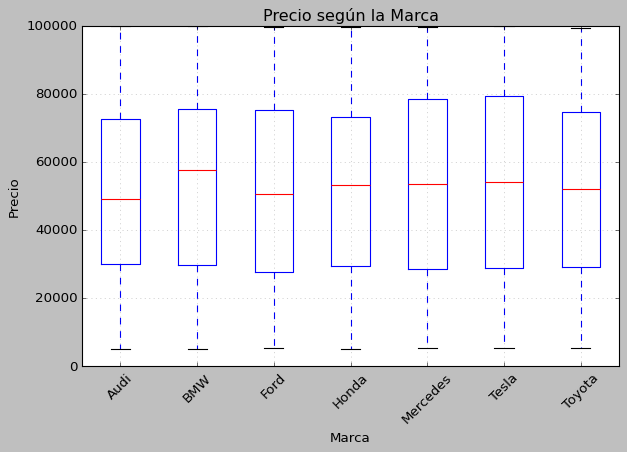

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
car_price.boxplot(column='Price', by='Brand', rot=45)
plt.title("Precio según la Marca")
plt.suptitle("")  # para borrar el título automático feo de pandas
plt.xlabel("Marca")
plt.ylabel("Precio")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


<Figure size 640x400 with 0 Axes>

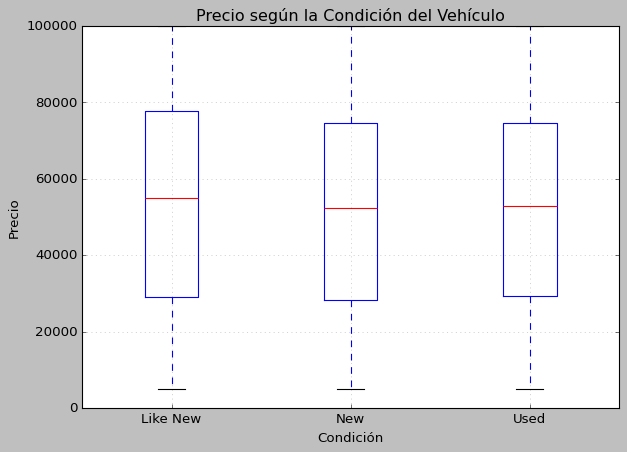

In [31]:
plt.figure(figsize=(8, 5))
car_price.boxplot(column='Price', by='Condition')
plt.title("Precio según la Condición del Vehículo")
plt.suptitle("")
plt.xlabel("Condición")
plt.ylabel("Precio")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


<Figure size 640x400 with 0 Axes>

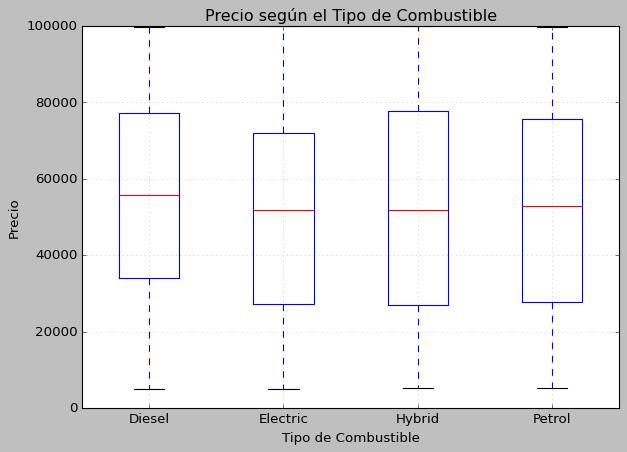

In [32]:
plt.figure(figsize=(8, 5))
car_price.boxplot(column='Price', by='Fuel Type')
plt.title("Precio según el Tipo de Combustible")
plt.suptitle("")
plt.xlabel("Tipo de Combustible")
plt.ylabel("Precio")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# El análisis de las relaciones entre el precio y las distintas variables del dataset muestra que no existen patrones fuertes ni tendencias marcadas. Al observar las comparaciones entre precio y variables como año, kilometraje, marca, condición o tipo de combustible, no se identifica una relación clara. Los puntos en los gráficos aparecen dispersos y sin una forma definida, y las correlaciones numéricas son muy bajas, lo que indica que estas variables no explican de manera directa las variaciones en el precio.

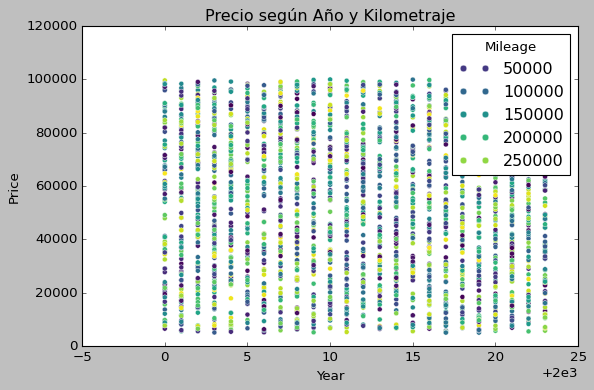

In [35]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.scatterplot(data=car_price, x='Year', y='Price', hue='Mileage', palette='viridis')
plt.title('Precio según Año y Kilometraje')
plt.show()


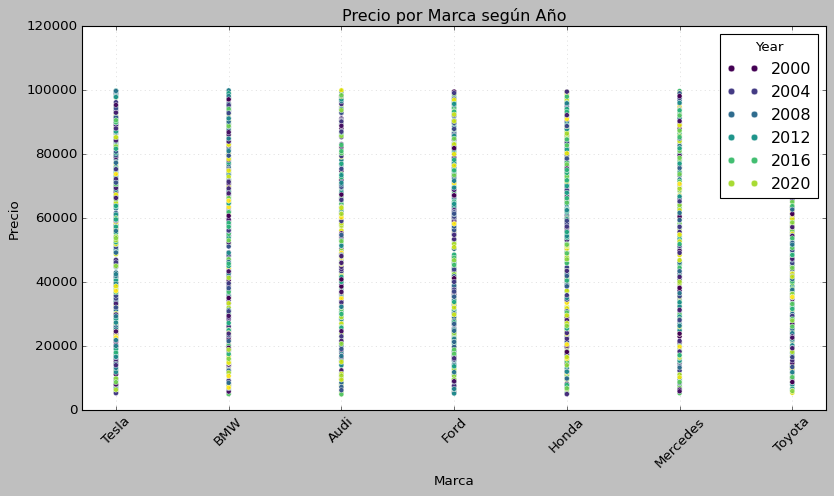

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.scatterplot(
    data=car_price,
    x='Brand',
    y='Price',
    hue='Year',
    palette='viridis'
)

plt.xticks(rotation=45)
plt.title('Precio por Marca según Año')
plt.xlabel('Marca')
plt.ylabel('Precio')
plt.grid(alpha=0.2)
plt.show()
